# Plan-and-Execute

https://github.com/langchain-ai/langgraph/blob/main/examples/plan-and-execute/plan-and-execute.ipynb

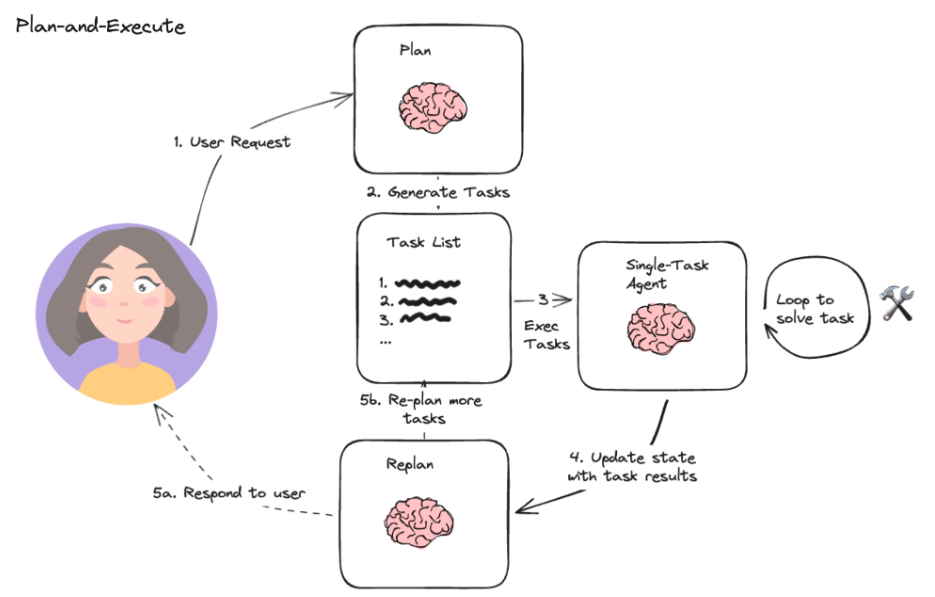

In [2]:
import boto3

In [3]:
!pip3 install langchain-aws langchain-community langchain --quiet

In [4]:
from botocore.config import Config
from langchain_aws import ChatBedrock
bedrock_region = 'us-east-1'
modelId = "anthropic.claude-3-sonnet-20240229-v1:0"
boto3_bedrock = boto3.client(
    service_name='bedrock-runtime',
    region_name=bedrock_region,
    config=Config(
        retries = {
            'max_attempts': 30
        }            
    )
)

HUMAN_PROMPT = "\n\nHuman:"
AI_PROMPT = "\n\nAssistant:"
maxOutputTokens = 4096
parameters = {
    "max_tokens":maxOutputTokens,     
    "temperature":0.1,
    "top_k":250,
    "top_p":0.9,
    "stop_sequences": [HUMAN_PROMPT]
}    
chat = ChatBedrock(   
    model_id=modelId,
    client=boto3_bedrock, 
    model_kwargs=parameters,
)

In [5]:
from langchain.memory import ConversationBufferWindowMemory
memory_chain = ConversationBufferWindowMemory(memory_key="chat_history", output_key='answer', return_messages=True, k=10)

In [7]:
import os

In [9]:
!pip install -U langchain-community tavily-python --quiet

In [10]:
langsmith_api_key = getpass.getpass("Password:")

Password: ········


In [11]:
os.environ["LANGCHAIN_API_KEY"] = langsmith_api_key
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "Reflection-Agent"

In [31]:
from langchain_core.messages import AIMessage, BaseMessage, HumanMessage
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "당신은 5문단의 에세이 작성을 돕는 작가이고 이름은 서연입니다"
            "사용자의 요청에 대해 최고의 에세이를 작성하세요."
            "사용자가 에세이에 대해 평가를 하면, 이전 에세이를 수정하여 답변하세요."
            "완성된 에세이는 <result> tag를 붙여주세요.",
        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
)
chain = prompt | chat

essay = ""
request = HumanMessage(
    content="어린왕자가 현대 아동문학에 어떤 의미를 가지는지 에세이로 작성하세요."
)

output = chain.stream({"messages": [request]})
for event in output:
    print(event.content, end="")
    essay += event.content
    
essay = essay[essay.find('<result>')+8:len(essay)-9]
essay

<result>
1문단: 앙투안 드 생텍쥐페리의 '어린왕자'는 현대 아동문학의 고전으로 자리잡은 작품입니다. 이 작품은 단순한 동화 이상의 깊이 있는 메시지를 전달하며, 어린이와 어른 모두에게 사랑받고 있습니다. 어린왕자는 현대 아동문학에 큰 영향을 미쳤으며, 그 의미를 살펴보면 다음과 같습니다.

2문단: 첫째, 어린왕자는 순수함과 상상력의 중요성을 일깨웁니다. 어린왕자는 어른들의 세계에 대해 의문을 품고, 자신만의 시선으로 세상을 바라봅니다. 이를 통해 독자들에게 어린 시절의 순수한 마음가짐과 상상력의 가치를 일깨워줍니다. 현대 아동문학에서 이러한 메시지는 매우 중요한 부분을 차지합니다.

3문단: 둘째, 어린왕자는 진정한 사랑과 우정의 의미를 탐구합니다. 어린왕자는 여러 행성을 여행하며 다양한 인물들을 만나고, 그들과의 관계를 통해 사랑과 우정의 진정한 의미를 깨닫게 됩니다. 이는 아동문학에서 자주 다루어지는 주제이며, 어린왕자는 이를 매우 섬세하고 깊이 있게 표현했습니다.

4문단: 셋째, 어린왕자는 상징과 은유를 활용하여 철학적 메시지를 전달합니다. 작품 속에는 여러 상징과 은유가 등장하며, 이를 통해 삶과 죽음, 사랑과 우정, 진정한 가치 등에 대한 깊이 있는 메시지를 전달합니다. 이러한 방식은 아동문학에서 자주 사용되지만, 어린왕자는 그 수준을 한층 더 높였습니다.

5문단: 결론적으로 어린왕자는 순수함과 상상력, 사랑과 우정, 철학적 메시지 등을 통해 현대 아동문학에 큰 영향을 미쳤습니다. 이 작품은 단순한 동화를 넘어 인생에 대한 깊이 있는 통찰력을 제공하며, 어린이와 어른 모두에게 사랑받고 있습니다. 어린왕자의 메시지는 시대를 초월하여 현대 아동문학에 지속적으로 영향을 미칠 것입니다.
</result>

"\n1문단: 앙투안 드 생텍쥐페리의 '어린왕자'는 현대 아동문학의 고전으로 자리잡은 작품입니다. 이 작품은 단순한 동화 이상의 깊이 있는 메시지를 전달하며, 어린이와 어른 모두에게 사랑받고 있습니다. 어린왕자는 현대 아동문학에 큰 영향을 미쳤으며, 그 의미를 살펴보면 다음과 같습니다.\n\n2문단: 첫째, 어린왕자는 순수함과 상상력의 중요성을 일깨웁니다. 어린왕자는 어른들의 세계에 대해 의문을 품고, 자신만의 시선으로 세상을 바라봅니다. 이를 통해 독자들에게 어린 시절의 순수한 마음가짐과 상상력의 가치를 일깨워줍니다. 현대 아동문학에서 이러한 메시지는 매우 중요한 부분을 차지합니다.\n\n3문단: 둘째, 어린왕자는 진정한 사랑과 우정의 의미를 탐구합니다. 어린왕자는 여러 행성을 여행하며 다양한 인물들을 만나고, 그들과의 관계를 통해 사랑과 우정의 진정한 의미를 깨닫게 됩니다. 이는 아동문학에서 자주 다루어지는 주제이며, 어린왕자는 이를 매우 섬세하고 깊이 있게 표현했습니다.\n\n4문단: 셋째, 어린왕자는 상징과 은유를 활용하여 철학적 메시지를 전달합니다. 작품 속에는 여러 상징과 은유가 등장하며, 이를 통해 삶과 죽음, 사랑과 우정, 진정한 가치 등에 대한 깊이 있는 메시지를 전달합니다. 이러한 방식은 아동문학에서 자주 사용되지만, 어린왕자는 그 수준을 한층 더 높였습니다.\n\n5문단: 결론적으로 어린왕자는 순수함과 상상력, 사랑과 우정, 철학적 메시지 등을 통해 현대 아동문학에 큰 영향을 미쳤습니다. 이 작품은 단순한 동화를 넘어 인생에 대한 깊이 있는 통찰력을 제공하며, 어린이와 어른 모두에게 사랑받고 있습니다. 어린왕자의 메시지는 시대를 초월하여 현대 아동문학에 지속적으로 영향을 미칠 것입니다.\n"

## Reflect

In [33]:
reflection_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "당신은 교사로서 학셍의 에세이를 평가하삽니다. 비평과 개선사항을 친절하게 설명해주세요."
            "이때 장점, 단점, 길이, 깊이, 스타일등에 대해 충분한 정보를 제공합니다."
            "특히 주제에 맞는 적절한 예제가 잘 반영되어있는지 확인합니다",
        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
)
reflect = reflection_prompt | chat

reflection = ""

output = reflect.stream({"messages": [request, HumanMessage(content=essay)]})
for event in output:
    print(event.content, end="")
    reflection += event.content

전반적으로 잘 구성된 에세이입니다. 주제에 대한 이해도가 높고, 어린왕자가 현대 아동문학에 미친 영향을 구체적으로 설명하고 있습니다. 다음은 몇 가지 개선할 점을 제안하겠습니다.

장점:
- 주제에 대한 명확한 이해와 논점 전개
- 어린왕자의 의미를 세 가지 측면(순수함, 사랑/우정, 철학적 메시지)으로 나누어 구체적으로 설명
- 문단 구성이 자연스럽고 논리적임
- 적절한 길이와 깊이

개선할 점: 
- 2문단에서 "순수함과 상상력의 중요성"에 대해 구체적인 예시를 들면 더 설득력 있을 것 같습니다.
- 3문단의 "사랑과 우정의 진정한 의미"에서 작품 속 어떤 장면이나 등장인물의 예를 들어 설명하면 좋겠습니다.
- 4문단에서 상징과 은유의 구체적인 예시를 추가하면 이해가 더 쉬울 것입니다.
- 5문단의 결론 부분에서 앞서 언급한 세 가지 측면을 다시 한번 요약하고 강조하면 좋겠습니다.

전체적으로 주제 이해도가 높고 논리적인 구성을 가진 에세이입니다. 위에서 제안한 부분들을 보완하면 더욱 설득력 있는 에세이가 될 것입니다.

In [34]:
reflection

'전반적으로 잘 구성된 에세이입니다. 주제에 대한 이해도가 높고, 어린왕자가 현대 아동문학에 미친 영향을 구체적으로 설명하고 있습니다. 다음은 몇 가지 개선할 점을 제안하겠습니다.\n\n장점:\n- 주제에 대한 명확한 이해와 논점 전개\n- 어린왕자의 의미를 세 가지 측면(순수함, 사랑/우정, 철학적 메시지)으로 나누어 구체적으로 설명\n- 문단 구성이 자연스럽고 논리적임\n- 적절한 길이와 깊이\n\n개선할 점: \n- 2문단에서 "순수함과 상상력의 중요성"에 대해 구체적인 예시를 들면 더 설득력 있을 것 같습니다.\n- 3문단의 "사랑과 우정의 진정한 의미"에서 작품 속 어떤 장면이나 등장인물의 예를 들어 설명하면 좋겠습니다.\n- 4문단에서 상징과 은유의 구체적인 예시를 추가하면 이해가 더 쉬울 것입니다.\n- 5문단의 결론 부분에서 앞서 언급한 세 가지 측면을 다시 한번 요약하고 강조하면 좋겠습니다.\n\n전체적으로 주제 이해도가 높고 논리적인 구성을 가진 에세이입니다. 위에서 제안한 부분들을 보완하면 더욱 설득력 있는 에세이가 될 것입니다.'

## Repeat

In [35]:
result = ""
output = chain.stream({"messages": [request, AIMessage(content=essay), HumanMessage(content=reflection)]})
for chunk in output:
    print(chunk.content, end="")
    
    result = result + chunk.content

#result = result[result.find('<result>')+8:len(result)-9]
result
    

감사합니다. 좋은 피드백을 주셔서 에세이를 개선할 수 있었습니다. 제안해주신 부분들을 반영하여 수정하겠습니다.

<result>
1문단: 앙투안 드 생텍쥐페리의 '어린왕자'는 현대 아동문학의 고전으로 자리잡은 작품입니다. 이 작품은 단순한 동화 이상의 깊이 있는 메시지를 전달하며, 어린이와 어른 모두에게 사랑받고 있습니다. 어린왕자는 현대 아동문학에 큰 영향을 미쳤으며, 그 의미를 살펴보면 다음과 같습니다.

2문단: 첫째, 어린왕자는 순수함과 상상력의 중요성을 일깨웁니다. 어린왕자는 어른들의 세계에 대해 의문을 품고, 자신만의 시선으로 세상을 바라봅니다. 예를 들어 어린왕자는 장미꽃에 대해 "너는 내가 길들인 유일한 장미꽃이야"라고 말하며, 장미꽃과 특별한 관계를 맺습니다. 이처럼 어린왕자는 사물에 대한 순수한 시선과 상상력을 보여주며, 독자들에게 어린 시절의 소중한 가치를 일깨워줍니다.

3문단: 둘째, 어린왕자는 진정한 사랑과 우정의 의미를 탐구합니다. 어린왕자는 여우와의 만남을 통해 "길들이는 것이 중요하다"는 교훈을 얻고, 사랑의 진정한 의미를 깨닫게 됩니다. 또한 조종사와 우정을 나누며 진정한 우정의 가치를 배웁니다. 이처럼 작품은 사랑과 우정의 의미를 섬세하게 다루고 있습니다.

4문단: 셋째, 어린왕자는 상징과 은유를 활용하여 철학적 메시지를 전달합니다. 예를 들어 사막에서 만난 뱀은 죽음을, 유리 곽은 어른들의 세계를 상징합니다. 또한 "어른들은 설명을 해달라고 하지 않으면 아무것도 이해하지 못한다"는 말은 어른들의 한계를 은유적으로 표현합니다. 이러한 상징과 은유를 통해 작품은 삶과 죽음, 진정한 가치 등에 대한 철학적 메시지를 전달합니다.

5문단: 결론적으로 어린왕자는 순수함과 상상력, 사랑과 우정, 철학적 메시지 등을 통해 현대 아동문학에 큰 영향을 미쳤습니다. 이 작품은 단순한 동화를 넘어 인생에 대한 깊이 있는 통찰력을 제공하며, 어린이와 어른 모두에게 사랑받고 있습니다. 어린왕자의 순수한 시선과 상상력, 사랑과 우정에 대한 탐구, 

'감사합니다. 좋은 피드백을 주셔서 에세이를 개선할 수 있었습니다. 제안해주신 부분들을 반영하여 수정하겠습니다.\n\n<result>\n1문단: 앙투안 드 생텍쥐페리의 \'어린왕자\'는 현대 아동문학의 고전으로 자리잡은 작품입니다. 이 작품은 단순한 동화 이상의 깊이 있는 메시지를 전달하며, 어린이와 어른 모두에게 사랑받고 있습니다. 어린왕자는 현대 아동문학에 큰 영향을 미쳤으며, 그 의미를 살펴보면 다음과 같습니다.\n\n2문단: 첫째, 어린왕자는 순수함과 상상력의 중요성을 일깨웁니다. 어린왕자는 어른들의 세계에 대해 의문을 품고, 자신만의 시선으로 세상을 바라봅니다. 예를 들어 어린왕자는 장미꽃에 대해 "너는 내가 길들인 유일한 장미꽃이야"라고 말하며, 장미꽃과 특별한 관계를 맺습니다. 이처럼 어린왕자는 사물에 대한 순수한 시선과 상상력을 보여주며, 독자들에게 어린 시절의 소중한 가치를 일깨워줍니다.\n\n3문단: 둘째, 어린왕자는 진정한 사랑과 우정의 의미를 탐구합니다. 어린왕자는 여우와의 만남을 통해 "길들이는 것이 중요하다"는 교훈을 얻고, 사랑의 진정한 의미를 깨닫게 됩니다. 또한 조종사와 우정을 나누며 진정한 우정의 가치를 배웁니다. 이처럼 작품은 사랑과 우정의 의미를 섬세하게 다루고 있습니다.\n\n4문단: 셋째, 어린왕자는 상징과 은유를 활용하여 철학적 메시지를 전달합니다. 예를 들어 사막에서 만난 뱀은 죽음을, 유리 곽은 어른들의 세계를 상징합니다. 또한 "어른들은 설명을 해달라고 하지 않으면 아무것도 이해하지 못한다"는 말은 어른들의 한계를 은유적으로 표현합니다. 이러한 상징과 은유를 통해 작품은 삶과 죽음, 진정한 가치 등에 대한 철학적 메시지를 전달합니다.\n\n5문단: 결론적으로 어린왕자는 순수함과 상상력, 사랑과 우정, 철학적 메시지 등을 통해 현대 아동문학에 큰 영향을 미쳤습니다. 이 작품은 단순한 동화를 넘어 인생에 대한 깊이 있는 통찰력을 제공하며, 어린이와 어른 모두에게 사랑받고 있습니다. 어린왕자의 순수한 시선과 상상력, 사

## Define graph

In [36]:
pip install langgraph --q

Note: you may need to restart the kernel to use updated packages.


In [37]:
from langgraph.graph.message import add_messages
from typing import TypedDict, Annotated, Sequence, List, Union

class ChatAgentState(TypedDict):
    # messages: Annotated[Sequence[BaseMessage], operator.add]
    messages: Annotated[list, add_messages]

In [38]:
def generation_node(state: ChatAgentState):
    
    response = chain.invoke(state["messages"])
    return {"messages": [response]}

In [39]:
def reflection_node(state: ChatAgentState):
    messages = state["messages"]
    
    # Other messages we need to adjust
    cls_map = {"ai": HumanMessage, "human": AIMessage}
    # First message is the original user request. We hold it the same for all nodes
    translated = [messages[0]] + [
        cls_map[msg.type](content=msg.content) for msg in messages[1:]
    ]
    res = reflect.invoke({"messages": translated})
    # print('\nreflect: ', res.content)
    
    response = HumanMessage(content=res.content)
    # print('response: ', response)
    
    return {"messages": [response]}

In [40]:
def should_continue(state: ChatAgentState):
    messages = state["messages"]
    print('\nlength:', len(messages)) 
    
    if len(messages) >= 6:
        # End after 3 iterations
        return "end"
    else:
        return "continue"

In [41]:
from langgraph.graph import START, END, StateGraph

workflow = StateGraph(ChatAgentState)
workflow.add_node("generate", generation_node)
workflow.add_node("reflect", reflection_node)
workflow.set_entry_point("generate")
workflow.add_conditional_edges(
    "generate",
    should_continue,
    {
        "continue": "reflect",
        "end": END,
    },
)

workflow.add_edge("reflect", "generate")
app_reflection = workflow.compile()

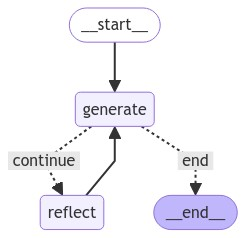

In [42]:
from IPython.display import Image, display

try:
    display(Image(app_reflection.get_graph(xray=True).draw_mermaid_png()))
except:
    pass

In [43]:
query = "한국 인공지능 발전을 어떤 준비를 해야할지 설명하세요. 특히 한국의 현황과 향후 중국, 일본, 미국과 어떻게 경쟁해야할지 기술하세요."
inputs = [HumanMessage(content=query)]

for event in app_reflection.stream({"messages": inputs}, stream_mode="values"):   
    #print('event: ', event)
        
    message = event["messages"][-1]
    #print('message: ', message)
        
    if message.content and len(event["messages"])>1:
        print('generate: ', message.content)
        #if output == "": # first message
        #    output = message.content 
        #else: # other messages
        #    output = f"{output}\n\n{message.content}"
        #print('output: ', output)


length: 2
generate:  <result>
한국 인공지능 산업의 발전을 위해서는 다음과 같은 준비가 필요합니다:

1. 인재 양성
인공지능 기술을 선도할 수 있는 우수한 인재 양성이 필수적입니다. 정부와 기업, 대학이 협력하여 인공지능 전문가를 체계적으로 육성하고, 해외 두뇌 유치에도 힘써야 합니다.

2. 연구개발 투자 확대
정부와 민간 기업의 인공지능 연구개발에 대한 투자를 대폭 확대해야 합니다. 기초연구와 응용연구에 균형있게 투자하여 원천기술 확보와 상용화를 동시에 추진해야 합니다.

3. 데이터 인프라 구축
인공지능 기술 발전을 위해서는 양질의 데이터 확보가 관건입니다. 정부 주도로 공공데이터를 적극 개방하고, 민간 기업의 데이터 구축을 지원해야 합니다.

4. 규제 정비 및 제도 마련
인공지능 기술의 안전성과 윤리성을 보장하기 위한 규제와 제도를 정비해야 합니다. 개인정보 보호, 알고리즘 공정성 등에 대한 기준을 마련해야 합니다.

5. 국제 협력 강화
인공지능 기술은 국가 간 경쟁이 치열한 분야입니다. 한국은 미국, 중국, 일본 등 선진국과의 협력을 강화하여 기술 교류와 공동 연구를 활성화해야 합니다.

한국은 우수한 ICT 인프라와 기술력을 바탕으로 인공지능 강국으로 도약할 수 있는 잠재력을 가지고 있습니다. 정부와 민간이 힘을 모아 체계적인 준비를 해나간다면 국제 경쟁력을 확보할 수 있을 것입니다.
</result>
generate:  전반적으로 에세이는 한국 인공지능 발전을 위해 필요한 준비사항들을 잘 정리하고 있습니다. 주요 내용과 구조가 명확하고 논리적입니다. 다만 몇 가지 개선할 점이 있습니다.

장점:
- 인재 양성, 연구개발 투자, 데이터 인프라, 규제 정비, 국제협력 등 주요 준비사항을 체계적으로 제시함
- 각 준비사항에 대해 구체적인 설명과 방안을 제시함
- 한국의 현황과 잠재력에 대해 언급하며 주제에 부합함

단점: 
- 중국, 일본, 미국 등 주요 국가들과의 경쟁 방안에 대한 구체적인 설명이 부족함
- 한국의 현황(